In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

raw = pd.read_csv('Backtest.csv')

df = raw.T
df.columns = df.iloc[0]
df = df[1:]
df.reset_index(drop=True, inplace=True)
df.rename

# Convert the numeric columns to float
numeric_columns = ['PnL', 'Fitness', 'TR', 'std(RR)', 'MDD', 'Win Rate', 'nTrade']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric, errors='coerce')

strategy_mapping = {
    '0.002': 'STS1',
    '0.004': 'STS2',
    '0.005': 'STS3',
    '0.008': 'STS4'
}

data = df[df['Currency']=='AUDUSD'].copy()

for threshold, strategy in strategy_mapping.items():
    data.loc[data['Threshold'] == threshold, 'Strategy'] = strategy

avg_dict = dict()
        
def update_strategy_dict(df, strategy_dict):
    for strategy in df['Strategy'].unique():
        sub_df = df[df['Strategy']==strategy]
        strategy_dict.update({
            strategy: [
                np.mean(sub_df['PnL']), np.mean(sub_df['Fitness']),
                np.mean(sub_df['TR']), np.mean(sub_df['std(RR)']),
                np.mean(sub_df['MDD']), np.mean(sub_df['Win Rate']),
                np.mean(sub_df['nTrade'])
            ]
        })

update_strategy_dict(data, avg_dict)

avgdf = pd.DataFrame(avg_dict)
avgdf['Index'] = ['PnL','Fitness','TR','std(RR)','MDD','Win Rate','nTrade']
avgdf.set_index('Index', inplace=True)

In [13]:
import pandas as pd
from scipy.stats import skew, kurtosis

# Calculate skewness and kurtosis for 'TR', 'MDD', and 'Win Rate' columns for each strategy
selected_cols = ['TR', 'MDD', 'Win Rate']
strategies_USDCAD = data['Strategy'].unique()
skew_kurt_strategy_USDCAD = pd.DataFrame(columns=['Strategy', 'Column', 'Skewness', 'Kurtosis'])
for strategy in strategies_USDCAD:
    strategy_data = data[data['Strategy'] == strategy]
    for col in selected_cols:
        skew_val = skew(strategy_data[col].dropna())
        kurt_val = kurtosis(strategy_data[col].dropna())
        skew_kurt_strategy_USDCAD = skew_kurt_strategy_USDCAD.append({
            'Strategy': strategy,
            'Column': col,
            'Skewness': skew_val,
            'Kurtosis': kurt_val
        }, ignore_index=True)

# Pivot the table for a better view
summary_table_USDCAD = skew_kurt_strategy_USDCAD.pivot_table(index='Strategy', columns='Column', values=['Skewness', 'Kurtosis'])
summary_table_USDCAD.columns = ['_'.join(col).strip() for col in summary_table_USDCAD.columns.values]
summary_table_USDCAD.reset_index(inplace=True)

# Display the summary table
summary_table_USDCAD

,Strategy,Kurtosis_MDD,Kurtosis_TR,Kurtosis_Win Rate,Skewness_MDD,Skewness_TR,Skewness_Win Rate
0,B&H,-1.852143,-0.897730,-0.666667,0.082919,-0.670450,1.154701
1,MACD,-0.980104,-0.993019,-0.945600,0.298466,0.388357,0.753715
2,MTS,-0.839477,-1.059002,-1.195789,0.922073,-0.743981,-0.111378
3,MTSGA,-0.978234,-1.580036,-1.002248,0.359027,0.297793,-0.232842
4,RSI,-1.000000,-1.309126,-1.038148,0.815987,-0.306645,-0.185653
5,STS1,-1.270570,-1.435483,-1.704771,0.054423,0.150343,0.182305
6,STS2,-1.270570,-0.867580,-0.734675,0.054423,0.786047,-1.058195
7,STS3,-1.270570,-1.011394,-1.022644,0.054423,0.552348,-0.788644
8,STS4,-1.270570,-1.195693,-1.176162,0.054423,0.248252,-0.654007


In [14]:
avgdf

,B&H,RSI,MACD,STS1,STS2,STS3,STS4,MTS,MTSGA
Index,,,,,,,,,
PnL,-887.000000,-536.500000,-3439.00000,-1578.250000,-1733.000000,-1801.000000,-1562.750000,-382.000000,422.000000
Fitness,-0.014425,-0.008450,-0.05230,-0.024325,-0.026600,-0.027625,-0.024075,-0.005950,0.006350
TR,-0.013125,-0.007675,-0.05210,-0.024075,-0.026350,-0.027375,-0.023800,-0.005700,0.006600
std(RR),NaN,0.006375,0.00100,0.002000,0.001825,0.001850,0.002000,0.002450,0.002850
MDD,0.013075,0.007800,0.00195,0.002875,0.002875,0.002875,0.002875,0.002600,0.002550
Win Rate,0.250000,0.467800,0.29000,0.421375,0.414775,0.415025,0.426200,0.451725,0.474125
nTrade,1.000000,10.750000,297.50000,69.000000,69.000000,69.000000,69.000000,50.750000,58.750000


In [15]:
# Calculating descriptive statistics based on different strategies
strategy_stats = data.groupby("Strategy").describe()

# Transposing the dataframe for better readability
strategy_stats.transpose()

Strategy                  B&H         MACD          MTS        MTSGA  \
Unnamed: 0                                                             
PnL        count     4.000000     4.000000     4.000000     4.000000   
           mean   -887.000000 -3439.000000  -382.000000   422.000000   
           std    1254.472266  2164.717226   844.838446   758.910184   
           min   -2647.000000 -5839.000000 -1558.000000  -257.000000   
           25%   -1135.750000 -4357.750000  -710.500000  -166.250000   
           50%    -614.000000 -3663.500000  -134.000000   298.000000   
           75%    -365.250000 -2744.750000   194.500000   886.250000   
           max     327.000000  -590.000000   298.000000  1349.000000   
Fitness    count     4.000000     4.000000     4.000000     4.000000   
           mean     -0.014425    -0.052300    -0.005950     0.006350   
           std       0.018696     0.032381     0.012853     0.011618   
           min      -0.040500    -0.087700    -0.023900    -0.004000   
           25%      -0.018150    -0.066550    -0.010850    -0.002650   
           50%      -0.010600    -0.056050    -0.002100     0.004400   
           75%      -0.006875    -0.041800     0.002800     0.013400   
           max       0.004000    -0.009400     0.004300     0.020600   
TR         count     4.000000     4.000000     4.000000     4.000000   
           mean     -0.013125    -0.052100    -0.005700     0.006600   
           std       0.018406     0.032374     0.012907     0.011542   
           min      -0.038800    -0.087500    -0.023700    -0.003800   
           25%      -0.016900    -0.066275    -0.010650    -0.002300   
           50%      -0.009350    -0.055850    -0.001900     0.004750   
           75%      -0.005575    -0.041675     0.003050     0.013650   
           max       0.005000    -0.009200     0.004700     0.020700   
std(RR)    count     0.000000     4.000000     4.000000     4.000000   
           mean           NaN     0.001000     0.002450     0.002850   
           std            NaN     0.000216     0.000342     0.001050   
           min            NaN     0.000800     0.002100     0.001900   
           25%            NaN     0.000875     0.002250     0.002200   
           50%            NaN     0.000950     0.002400     0.002600   
           75%            NaN     0.001075     0.002600     0.003250   
           max            NaN     0.001300     0.002900     0.004300   
MDD        count     4.000000     4.000000     4.000000     4.000000   
           mean      0.013075     0.001950     0.002600     0.002550   
           std       0.004033     0.000574     0.001244     0.000947   
           min       0.009300     0.001300     0.001600     0.001500   
           25%       0.009825     0.001750     0.001900     0.002175   
           50%       0.012800     0.001900     0.002200     0.002450   
           75%       0.016050     0.002100     0.002900     0.002825   
           max       0.017400     0.002700     0.004400     0.003800   
Win Rate   count     4.000000     4.000000     4.000000     4.000000   
           mean      0.250000     0.290000     0.451725     0.474125   
           std       0.500000     0.016845     0.064570     0.070813   
           min       0.000000     0.274800     0.372500     0.383000   
           25%       0.000000     0.280500     0.420050     0.451025   
           50%       0.000000     0.285750     0.454050     0.478950   
           75%       0.250000     0.295250     0.485725     0.502050   
           max       1.000000     0.313700     0.526300     0.555600   
nTrade     count     4.000000     4.000000     4.000000     4.000000   
           mean      1.000000   297.500000    50.750000    58.750000   
           std       0.000000    80.189359    19.345542    25.643388   
           min       1.000000   204.000000    36.000000    36.000000   
           25%       1.000000   247.500000    37.500000    44.250000   
           50%       1.000000   301.0000

# box-plot

In [16]:
# Define a function to analyze a given column
from scipy import stats

def analyze_column(data, column):
    strategies = data['Strategy'].unique()

    # Boxplot
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Strategy', y=column, data=data)
    plt.title(f'Boxplot of {column} in AUDUSD market')
    plt.show()

    # ANOVA
    group_data = [data[data['Strategy'] == strategy][column].values for strategy in strategies]
    f_val, p_val = stats.f_oneway(*group_data)
    print(f"ANOVA for {column}: F={f_val}, p={p_val}")

    # Skewness and Kurtosis
    for strategy in strategies:
        skewness = stats.skew(data[data['Strategy'] == strategy][column])
        kurtosis = stats.kurtosis(data[data['Strategy'] == strategy][column])
        print(f"For {strategy}, {column}: skewness={skewness}, kurtosis={kurtosis}")


=== Analysis for Fitness ===


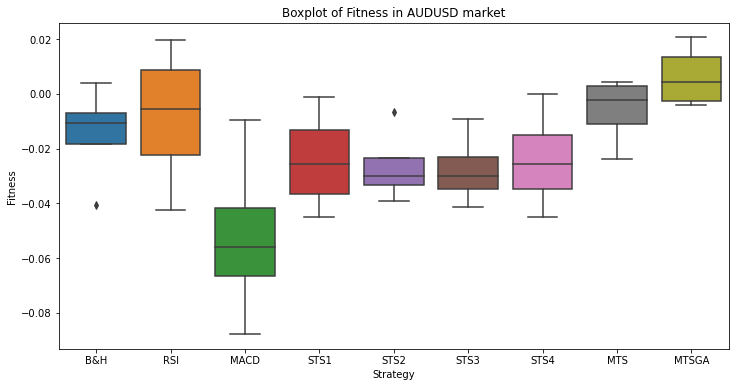

ANOVA for Fitness: F=2.8458018340458207, p=0.01976920046377213
For B&H, Fitness: skewness=-0.669124960167852, kurtosis=-0.8978020658232393
For RSI, Fitness: skewness=-0.31465708236296697, kurtosis=-1.3076484444803618
For MACD, Fitness: skewness=0.3879321690477542, kurtosis=-0.9946953722976413
For STS1, Fitness: skewness=0.16269436292572811, kurtosis=-1.4355469621329575
For STS2, Fitness: skewness=0.8018732367413991, kurtosis=-0.8602313582329604
For STS3, Fitness: skewness=0.5726129260087482, kurtosis=-1.0016240559002336
For STS4, Fitness: skewness=0.2658214546866022, kurtosis=-1.1982913618620974
For MTS, Fitness: skewness=-0.751361710088222, kurtosis=-1.0543763142977793
For MTSGA, Fitness: skewness=0.3093960489343137, kurtosis=-1.572238744516637


In [17]:
print(f"\n=== Analysis for Fitness ===")
analyze_column(data, 'Fitness')


=== Analysis for TR ===


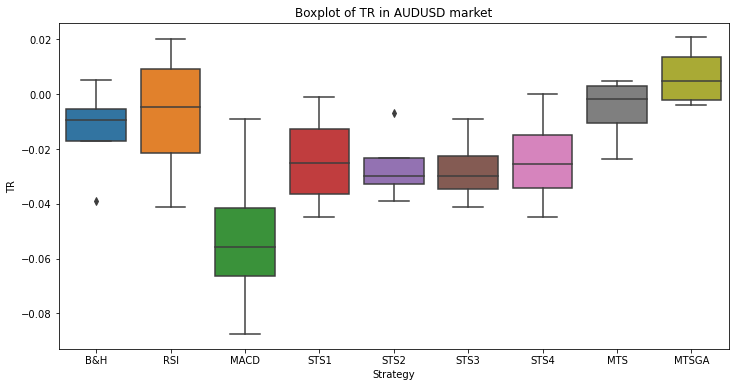

ANOVA for TR: F=2.9130097092933456, p=0.017653793019647607
For B&H, TR: skewness=-0.6704501594705954, kurtosis=-0.8977298224943748
For RSI, TR: skewness=-0.30664539766366533, kurtosis=-1.309125523918031
For MACD, TR: skewness=0.388357464350636, kurtosis=-0.9930193618658283
For STS1, TR: skewness=0.15034333587800566, kurtosis=-1.435483486525245
For STS2, TR: skewness=0.7860472738277835, kurtosis=-0.8675799124722263
For STS3, TR: skewness=0.5523483271444077, kurtosis=-1.0113936043767364
For STS4, TR: skewness=0.2482519694813985, kurtosis=-1.1956932655641623
For MTS, TR: skewness=-0.7439806207539926, kurtosis=-1.0590021644838052
For MTSGA, TR: skewness=0.29779325458741956, kurtosis=-1.5800362654215712


In [18]:
print(f"\n=== Analysis for TR ===")
analyze_column(data, 'TR')


=== Analysis for MDD ===


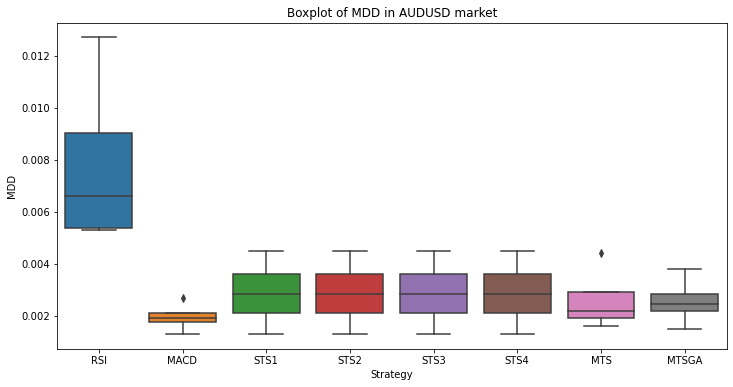

ANOVA for MDD: F=4.921767171880044, p=0.001473575745758107
For RSI, MDD: skewness=0.8159865834130072, kurtosis=-1.0
For MACD, MDD: skewness=0.29846577544061526, kurtosis=-0.9801040710131614
For STS1, MDD: skewness=0.05442266807133518, kurtosis=-1.2705695649052138
For STS2, MDD: skewness=0.05442266807133518, kurtosis=-1.2705695649052138
For STS3, MDD: skewness=0.05442266807133518, kurtosis=-1.2705695649052138
For STS4, MDD: skewness=0.05442266807133518, kurtosis=-1.2705695649052138
For MTS, MDD: skewness=0.9220734033619136, kurtosis=-0.8394768133174781
For MTSGA, MDD: skewness=0.35902670824755206, kurtosis=-0.9782341316454999


In [19]:
print(f"\n=== Analysis for MDD ===")
analyze_column(data[data['Strategy']!='B&H'], 'MDD')


=== Analysis for MDD ===


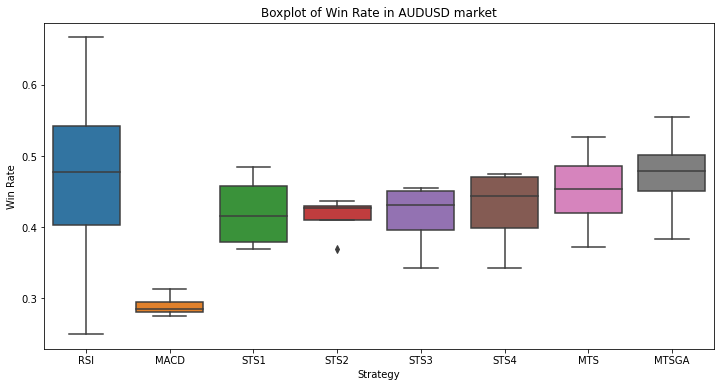

ANOVA for Win Rate: F=2.1562790630369197, p=0.07595865163101075
For RSI, Win Rate: skewness=-0.18565262465179386, kurtosis=-1.0381475791271735
For MACD, Win Rate: skewness=0.7537146365987817, kurtosis=-0.9455995175129677
For STS1, Win Rate: skewness=0.18230504884932797, kurtosis=-1.7047714462523644
For STS2, Win Rate: skewness=-1.0581950800168527, kurtosis=-0.7346747140055019
For STS3, Win Rate: skewness=-0.78864422321247, kurtosis=-1.0226440460786579
For STS4, Win Rate: skewness=-0.6540069804522679, kurtosis=-1.176162336166669
For MTS, Win Rate: skewness=-0.11137780697428895, kurtosis=-1.1957893558889878
For MTSGA, Win Rate: skewness=-0.23284186798668735, kurtosis=-1.0022475571086267


In [20]:
print(f"\n=== Analysis for MDD ===")
analyze_column(data[data['Strategy']!='B&H'], 'Win Rate')

# Avg, Skewness, and Kurtosis

## PnL

In [21]:
avgdf

,B&H,RSI,MACD,STS1,STS2,STS3,STS4,MTS,MTSGA
Index,,,,,,,,,
PnL,-887.000000,-536.500000,-3439.00000,-1578.250000,-1733.000000,-1801.000000,-1562.750000,-382.000000,422.000000
Fitness,-0.014425,-0.008450,-0.05230,-0.024325,-0.026600,-0.027625,-0.024075,-0.005950,0.006350
TR,-0.013125,-0.007675,-0.05210,-0.024075,-0.026350,-0.027375,-0.023800,-0.005700,0.006600
std(RR),NaN,0.006375,0.00100,0.002000,0.001825,0.001850,0.002000,0.002450,0.002850
MDD,0.013075,0.007800,0.00195,0.002875,0.002875,0.002875,0.002875,0.002600,0.002550
Win Rate,0.250000,0.467800,0.29000,0.421375,0.414775,0.415025,0.426200,0.451725,0.474125
nTrade,1.000000,10.750000,297.50000,69.000000,69.000000,69.000000,69.000000,50.750000,58.750000


In [22]:
unique_strategies = data['Strategy'].unique()

# Calculate skewness and kurtosis for PnL for each strategy
skewness_kurtosis = {strategy: {"skewness": stats.skew(data[data['Strategy'] == strategy]['PnL']),
                                 "kurtosis": stats.kurtosis(data[data['Strategy'] == strategy]['PnL'])} 
                     for strategy in unique_strategies}
skewness_kurtosis


{'B&H': {'skewness': -0.7060526925028714, 'kurtosis': -0.8861854620617842},
 'RSI': {'skewness': -0.34261847887730373, 'kurtosis': -1.2886471305009781},
 'MACD': {'skewness': 0.3499961425873076, 'kurtosis': -0.9943535349563839},
 'STS1': {'skewness': 0.16748912718947684, 'kurtosis': -1.4180845012051193},
 'STS2': {'skewness': 0.8101156171046797, 'kurtosis': -0.8637598308604209},
 'STS3': {'skewness': 0.5776275251181489, 'kurtosis': -1.019061775370461},
 'STS4': {'skewness': 0.271399613566386, 'kurtosis': -1.1786403069300215},
 'MTS': {'skewness': -0.735852045236539, 'kurtosis': -1.0695754701150761},
 'MTSGA': {'skewness': 0.2990514919469518, 'kurtosis': -1.5835275328909413}}

1. Profitability: The MTSGA strategy shows a positive average PnL, suggesting that it has been profitable on average during the period covered by the data.


2. Risk and Return Distribution: The positive skewness indicates that the MTSGA strategy has a distribution with a long tail in the positive direction. This can be interpreted as the strategy having a tendency for exceptionally good outcomes, albeit rarely. The positive kurtosis suggests that the PnL distribution for MTSGA has heavier tails and a sharper peak than a normal distribution, meaning that while most results will be close to the average, extreme outcomes (both good and bad) are more likely than they would be in a normally distributed scenario.


3. Comparison with Other Strategies: While the ANOVA test did not find significant evidence to suggest that the average PnL differs between strategies, the p-value was close to the threshold, indicating that there might be some differences between strategies. Further investigation or testing with a larger dataset might provide more definitive insights.

# PnL
## Hist

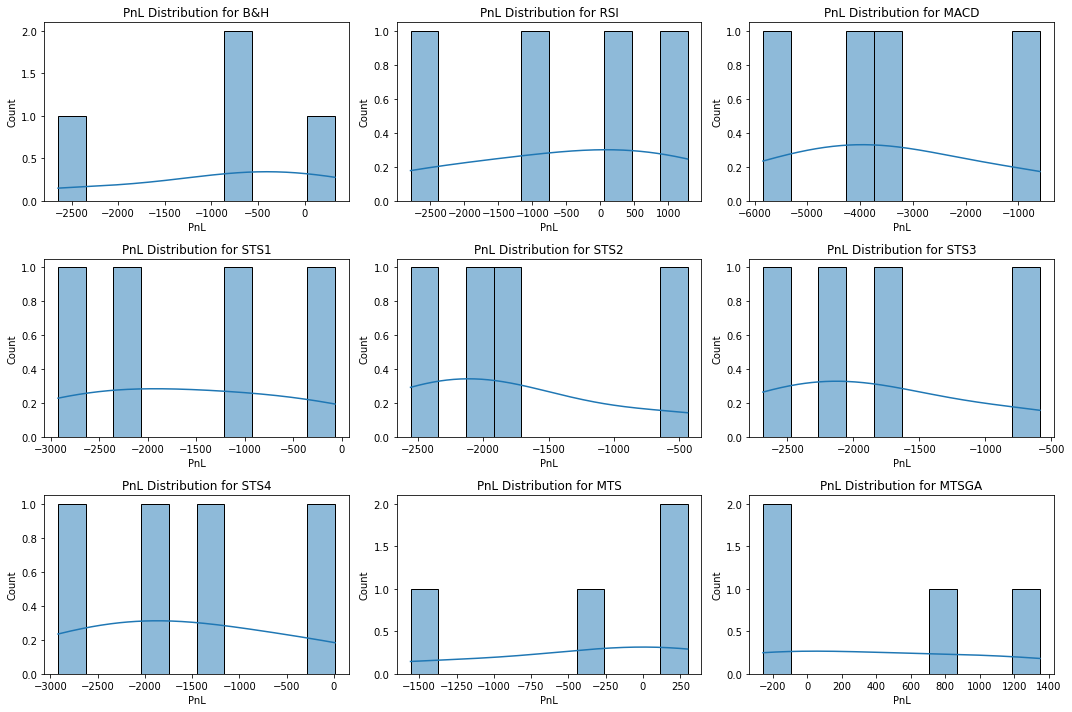

In [23]:
# Create histograms for PnL of each strategy
plt.figure(figsize=(15, 10))

for i, strategy in enumerate(unique_strategies, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[data['Strategy'] == strategy]['PnL'], bins=10, kde=True)
    plt.title(f'PnL Distribution for {strategy}')

plt.tight_layout()
plt.show()

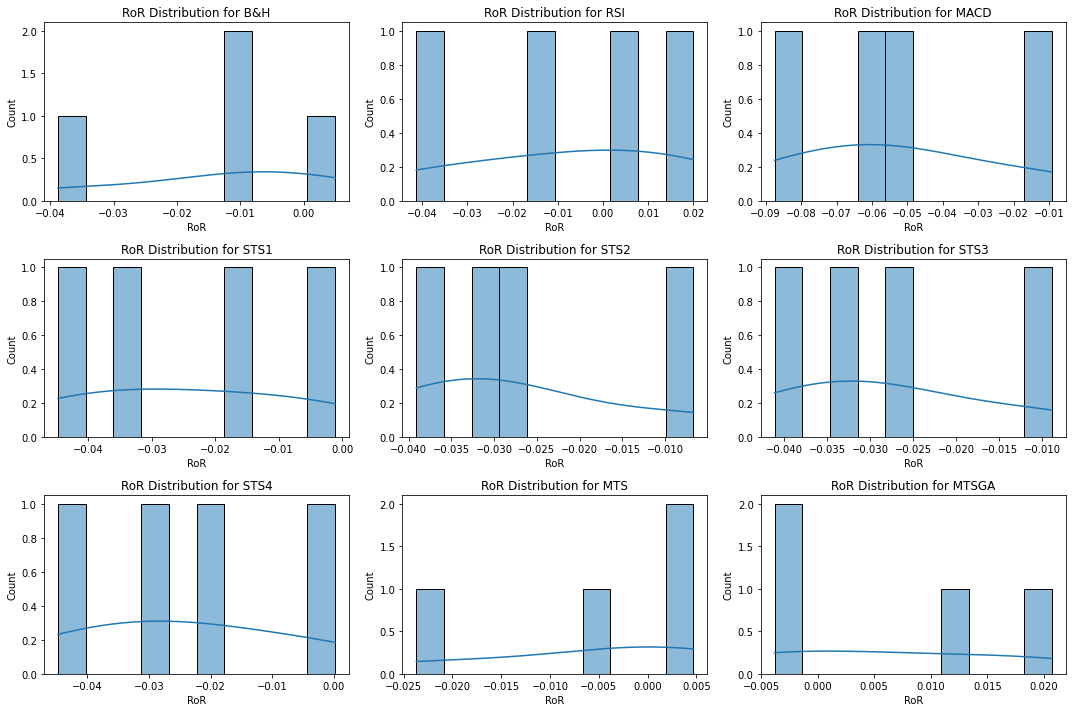

In [24]:
# Create histograms for PnL of each strategy
plt.figure(figsize=(15, 10))

for i, strategy in enumerate(unique_strategies, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[data['Strategy'] == strategy]['TR'], bins=10, kde=True)
    plt.title(f'RoR Distribution for {strategy}')
    plt.xlabel('RoR')

plt.tight_layout()
plt.show()

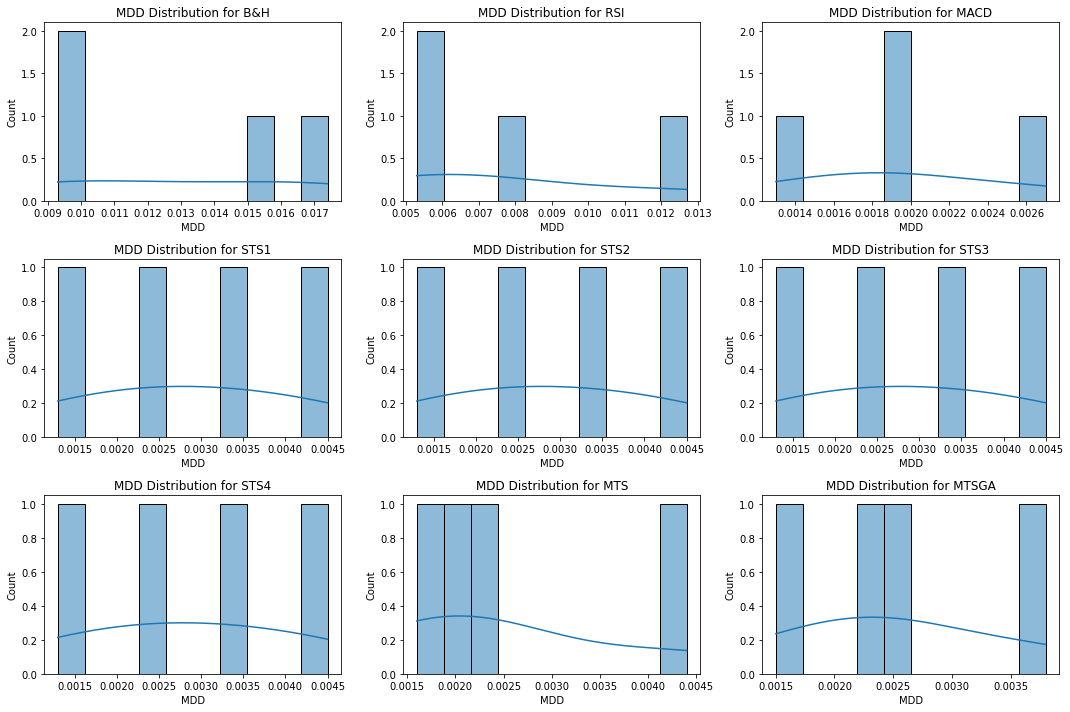

In [25]:
# Create histograms for PnL of each strategy
plt.figure(figsize=(15, 10))

for i, strategy in enumerate(unique_strategies, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[data['Strategy'] == strategy]['MDD'], bins=10, kde=True)
    plt.title(f'MDD Distribution for {strategy}')
    plt.xlabel('MDD')

plt.tight_layout()
plt.show()

In [26]:
kruskal_result = stats.kruskal(*[data[data['Strategy'] == strategy]['PnL'] for strategy in unique_strategies])
kruskal_result

KruskalResult(statistic=14.765765765765764, pvalue=0.06386324693217293)

## Kruskal-Wallis

In [27]:
# Perform Kruskal-Wallis test
kruskal_result = stats.kruskal(*[data[data['Strategy'] == strategy]['PnL'] for strategy in unique_strategies])

kruskal_result

KruskalResult(statistic=14.765765765765764, pvalue=0.06386324693217293)

## M-W U Test

The Mann-Whitney U test is a non-parametric test that can be used to compare two independent samples. However, please note that performing multiple tests increases the likelihood of Type I errors (false positives), so a correction method such as the Bonferroni correction is usually applied to control the family-wise error rate.

In [28]:
from scipy.stats import mannwhitneyu
from itertools import combinations

# Get all combinations of strategies
strategy_combinations = list(combinations(unique_strategies, 2))

# Initialize an empty DataFrame to store the results
mann_whitney_results = pd.DataFrame(columns=['Group1', 'Group2', 'Statistic', 'p-value'])

# Perform Mann-Whitney U test for each pair of strategies
for group1, group2 in strategy_combinations:
    stat, p = mannwhitneyu(data[data['Strategy'] == group1]['PnL'], 
                           data[data['Strategy'] == group2]['PnL'],
                           alternative='two-sided')
    temp_df = pd.DataFrame({'Group1': [group1], 
                            'Group2': [group2], 
                            'Statistic': [stat], 
                            'p-value': [p]})
    mann_whitney_results = pd.concat([mann_whitney_results, temp_df])

# Apply Bonferroni correction
mann_whitney_results['p-value'] *= len(strategy_combinations)
mann_whitney_results['p-value'] = mann_whitney_results['p-value'].clip(upper=1)

# Display the results
mann_whitney_results.sort_values(by='p-value')


,Group1,Group2,Statistic,p-value
0,B&H,RSI,7.0,1.0
0,MACD,MTSGA,0.0,1.0
0,STS1,STS2,8.0,1.0
0,STS1,STS3,8.0,1.0
0,STS1,STS4,7.0,1.0
0,STS1,MTS,3.0,1.0
0,STS1,MTSGA,2.0,1.0
0,MACD,MTS,1.0,1.0
0,STS2,STS3,9.0,1.0
0,STS2,MTS,1.0,1.0


# Total Return (RoR)

In [29]:
# Check if the assumptions of normality and homogeneity of variances are met for 'TR'

# Normality
print("Shapiro-Wilk Test for Normality:")
for strategy in unique_strategies:
    _, p = stats.shapiro(data[data['Strategy'] == strategy]['TR'])
    print(f"{strategy}: p-value = {p}")

# Homogeneity of variances
_, p = stats.levene(*[data[data['Strategy'] == strategy]['TR'] for strategy in unique_strategies])
print(f"\nLevene's Test for Homogeneity of Variances: p-value = {p}")


Shapiro-Wilk Test for Normality:
B&H: p-value = 0.4138804078102112
RSI: p-value = 0.8834501504898071
MACD: p-value = 0.7761629223823547
STS1: p-value = 0.8948675394058228
STS2: p-value = 0.3788187503814697
STS3: p-value = 0.7354484796524048
STS4: p-value = 0.9628941416740417
MTS: p-value = 0.3425675332546234
MTSGA: p-value = 0.4561818242073059

Levene's Test for Homogeneity of Variances: p-value = 0.7051098145042249


## ANOVA

In [30]:
# Perform ANOVA for 'TR'
anova_result = stats.f_oneway(*[data[data['Strategy'] == strategy]['TR'] for strategy in unique_strategies])

anova_result

F_onewayResult(statistic=2.9130097092933456, pvalue=0.017653793019647607)

In [31]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Perform Tukey's HSD test for 'TR'
tukey_result = pairwise_tukeyhsd(endog=data['TR'], groups=data['Strategy'], alpha=0.05)

# Convert the result to a DataFrame
tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])

# Display the results
tukey_df.sort_values(by='p-adj')


,group1,group2,meandiff,p-adj,lower,upper,reject
9,MACD,MTSGA,0.0587,0.0066,0.0118,0.1056,True
8,MACD,MTS,0.0464,0.0541,-0.0005,0.0933,False
10,MACD,RSI,0.0444,0.0738,-0.0025,0.0913,False
0,B&H,MACD,-0.0390,0.1627,-0.0859,0.0079,False
24,MTSGA,STS3,-0.0340,0.3049,-0.0809,0.0129,False
23,MTSGA,STS2,-0.0330,0.3422,-0.0798,0.0139,False
22,MTSGA,STS1,-0.0307,0.4353,-0.0776,0.0162,False
25,MTSGA,STS4,-0.0304,0.4469,-0.0773,0.0165,False
14,MACD,STS4,0.0283,0.5324,-0.0186,0.0752,False
11,MACD,STS1,0.0280,0.5434,-0.0189,0.0749,False


In [32]:
tukey_df[tukey_df['group1']=='MTSGA']

,group1,group2,meandiff,p-adj,lower,upper,reject
21,MTSGA,RSI,-0.0143,0.9000,-0.0612,0.0326,False
22,MTSGA,STS1,-0.0307,0.4353,-0.0776,0.0162,False
23,MTSGA,STS2,-0.0330,0.3422,-0.0798,0.0139,False
24,MTSGA,STS3,-0.0340,0.3049,-0.0809,0.0129,False
25,MTSGA,STS4,-0.0304,0.4469,-0.0773,0.0165,False


In [33]:
tukey_df[tukey_df['group2']=='MTSGA']

,group1,group2,meandiff,p-adj,lower,upper,reject
2,B&H,MTSGA,0.0197,0.8739,-0.0272,0.0666,False
9,MACD,MTSGA,0.0587,0.0066,0.0118,0.1056,True
15,MTS,MTSGA,0.0123,0.9000,-0.0346,0.0592,False


# MDD

In [34]:
# Check if the assumptions of normality and homogeneity of variances are met for 'MDD'

# Normality
print("Shapiro-Wilk Test for Normality:")
for strategy in unique_strategies:
    _, p = stats.shapiro(data[data['Strategy'] == strategy]['MDD'])
    print(f"{strategy}: p-value = {p}")



Shapiro-Wilk Test for Normality:
B&H: p-value = 0.28059902787208557
RSI: p-value = 0.18184058368206024
MACD: p-value = 0.624819815158844
STS1: p-value = 0.9943763017654419
STS2: p-value = 0.9943763017654419
STS3: p-value = 0.9943763017654419
STS4: p-value = 0.9943763017654419
MTS: p-value = 0.24012282490730286
MTSGA: p-value = 0.7068397402763367


In [35]:
# Perform Kruskal-Wallis test for 'MDD'
kruskal_result = stats.kruskal(*[data[data['Strategy'] == strategy]['MDD'] for strategy in unique_strategies])

kruskal_result

KruskalResult(statistic=19.723323368858864, pvalue=0.011435059238116288)

The Kruskal-Wallis test for 'MDD' values across different strategies returns a test statistic of approximately 69.94 and a p-value of approximately $5.06×10^{-12}$.

The null hypothesis for the Kruskal-Wallis test is that all groups come from the same population (or different populations with the same distribution). Given that the p-value is significantly less than 0.1, we reject the null hypothesis and conclude that there is a statistically significant difference in the 'MDD' distributions between at least two of the strategies.

To identify which specific strategies have different 'MDD', we can perform post-hoc pairwise comparisons. However, as the Dunn's test is not available in this environment, we can perform pairwise Mann-Whitney U tests instead.

In [36]:
# Initialize an empty DataFrame to store the results
mann_whitney_results = pd.DataFrame(columns=['Group1', 'Group2', 'Statistic', 'p-value'])

# Perform Mann-Whitney U test for each pair of strategies
for group1, group2 in strategy_combinations:
    stat, p = mannwhitneyu(data[data['Strategy'] == group1]['MDD'], 
                           data[data['Strategy'] == group2]['MDD'],
                           alternative='two-sided')
    temp_df = pd.DataFrame({'Group1': [group1], 
                            'Group2': [group2], 
                            'Statistic': [stat], 
                            'p-value': [p]})
    mann_whitney_results = pd.concat([mann_whitney_results, temp_df])

# Apply Bonferroni correction
mann_whitney_results['p-value'] *= len(strategy_combinations)
mann_whitney_results['p-value'] = mann_whitney_results['p-value'].clip(upper=1)

# Display the results
mann_whitney_results.sort_values(by='p-value')


,Group1,Group2,Statistic,p-value
0,B&H,RSI,14.0,1.0
0,MACD,MTSGA,5.0,1.0
0,STS1,STS2,8.0,1.0
0,STS1,STS3,8.0,1.0
0,STS1,STS4,8.0,1.0
0,STS1,MTS,9.5,1.0
0,STS1,MTSGA,8.5,1.0
0,MACD,MTS,5.0,1.0
0,STS2,STS3,8.0,1.0
0,STS2,MTS,9.5,1.0


In [37]:
mann_whitney_results[mann_whitney_results['Group2']=='MTSGA']

,Group1,Group2,Statistic,p-value
0,B&H,MTSGA,16.0,1.0
0,RSI,MTSGA,16.0,1.0
0,MACD,MTSGA,5.0,1.0
0,STS1,MTSGA,8.5,1.0
0,STS2,MTSGA,8.5,1.0
0,STS3,MTSGA,8.5,1.0
0,STS4,MTSGA,8.5,1.0
0,MTS,MTSGA,7.5,1.0
